<a href="https://colab.research.google.com/github/aiyingliulang/Play-with-Machine-Learning-Algorithms/blob/master/%E7%AC%AC4%E8%AF%BE_%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df_heart = pd.read_csv('heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df_heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

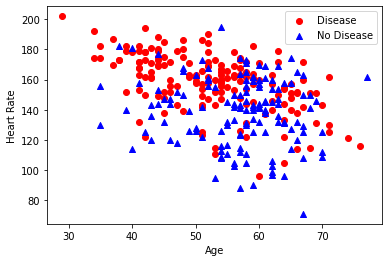

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df_heart.age[df_heart.target==1],
            y=df_heart.thalach[df_heart.target==1],c='r')
plt.scatter(x=df_heart.age[df_heart.target==0],
             y=df_heart.thalach[df_heart.target==0],c='b',marker='^')
plt.legend(['Disease','No Disease'])
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show()

In [ ]:
X = df_heart.drop(['target'],axis=1)
y = df_heart.target.values
y = y.reshape(-1,1)
print('张量X的形状：', X.shape)
print('张量y的形状：', y.shape)

张量X的形状： (303, 13)
张量y的形状： (303, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def sigmoid(z):
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

In [ ]:
def loss_function(X, y, w, b):
    y_hat = sigmoid(np.dot(X, w) + b)
    loss = -((y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    cost = np.sum(loss) / X.shape[0]
    return cost

In [ ]:
def gradient_descent(X, y, w, b, lr, iter):
    l_history = np.zeros(iter)
    w_history = np.zeros((iter, w.shape[0], w.shape[1]))
    b_history = np.zeros(iter)
    for i in range(iter):
        y_hat = sigmoid(np.dot(X, w) + b)
        loss = -((y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
        derivative_w = np.dot(X.T, ((y_hat - y))) / X.shape[0]
        derivative_b = np.sum(y_hat - y) / X.shape[0]
        w -= lr * derivative_w
        b -= lr * derivative_b
        l_history[i] = loss_function(X, y, w, b)
        print('轮次', i+1 ,'当前轮训练损失：', l_history[i])
        w_history[i] = w
        b_history[i] = b
    return l_history, w_history, b_history

In [ ]:
# loss_history, weight_history, bias_history = gradient_descent(X_train, y_train, weight, bias, alpha, iterations)

In [ ]:
def predict(X, w, b):
    z = np.dot(X, w) +b
    y_hat = sigmoid(z)
    y_pred = np.zeros((y_hat.shape[0], 1))
    for i in range(y_hat.shape[0]):
        if y_hat[i, 0] < 0.5:
           y_pred[i, 0] = 0
        else:
            y_pred[i, 0] = 1
    return y_pred

In [ ]:
def logistic_regression(X, y, w, b, lr, iter):
    l_history, w_history, b_history = gradient_descent(X, y, w, b, lr, iter)
    print('训练最终损失：', l_history[-1])
    y_pred = predict(X, w_history[-1], b_history[-1])
    training_acc = 100 - np.mean(np.abs(y_pred - y_train)) * 100
    print('逻辑回归准确率：{:.2f}%'.format(training_acc))
    return l_history, w_history, b_history

In [ ]:
dimension = X.shape[1]
weight = np.full((dimension, 1), 0.1)
bias = 0
alpha = 1
iterations = 500

In [ ]:
loss_history, weight_history, bias_history = logistic_regression(X_train, y_train, weight, bias, alpha, iterations)

轮次 1 当前轮训练损失： 0.6661603731025124
轮次 2 当前轮训练损失： 0.6384019260493835
轮次 3 当前轮训练损失： 0.6143635994762816
轮次 4 当前轮训练损失： 0.593394825558307
轮次 5 当前轮训练损失： 0.575033975702304
轮次 6 当前轮训练损失： 0.558887950464144
轮次 7 当前轮训练损失： 0.5446247741625077
轮次 8 当前轮训练损失： 0.5319656478079663
轮次 9 当前轮训练损失： 0.5206770991361436
轮次 10 当前轮训练损失： 0.5105637763055058
轮次 11 当前轮训练损失： 0.5014621163413852
轮次 12 当前轮训练损失： 0.4932349335729244
轮次 13 当前轮训练损失： 0.4857668756387074
轮次 14 当前轮训练损失： 0.4789606509003452
轮次 15 当前轮训练损失： 0.47273391806285764
轮次 16 当前轮训练损失： 0.4670167318525711
轮次 17 当前轮训练损失： 0.46174944909639715
轮次 18 当前轮训练损失： 0.4568810126383824
轮次 19 当前轮训练损失： 0.4523675436875151
轮次 20 当前轮训练损失： 0.4481711852206466
轮次 21 当前轮训练损失： 0.4442591495123525
轮次 22 当前轮训练损失： 0.4406029316628344
轮次 23 当前轮训练损失： 0.43717765826373584
轮次 24 当前轮训练损失： 0.43396154627230127
轮次 25 当前轮训练损失： 0.4309354519650733
轮次 26 当前轮训练损失： 0.42808249370992607
轮次 27 当前轮训练损失： 0.42538773540280467
轮次 28 当前轮训练损失： 0.42283791990967057
轮次 29 当前轮训练损失： 0.4204212438559771
轮次 30 当前轮训练损失： 0.41

In [ ]:
y_pred = predict(X_test, weight_history[-1], bias_history[-1])
testing_acc = 100 - np.mean(np.abs(y_pred - y_test)) * 100
print('逻辑回归测试准确率：{:.2f}%'.format(testing_acc))

逻辑回归测试准确率：75.41%


In [ ]:
print('逻辑回归预测分类值：\n', predict(X_test, weight_history[-1], bias_history[-1]))

逻辑回归预测分类值：
 [[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]]


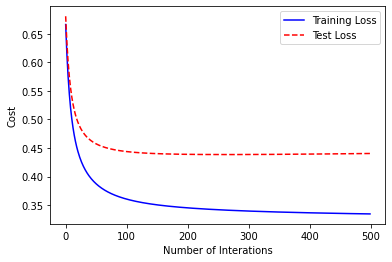

In [ ]:
loss_history_test = np.zeros(iterations)
for i in range(iterations):
    loss_history_test[i] = loss_function(X_test, y_test, weight_history[i], bias_history[i]) 
index = np.arange(0, iterations, 1)
plt.plot(index, loss_history, c='b', linestyle='solid')
plt.plot(index, loss_history_test, c='r', linestyle='--')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Number of Interations')
plt.ylabel('Cost')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
print('SK 预测准确率：{:.2f}%'.format(lr_model.score(X_test, y_test) * 100))

SK 预测准确率：70.49%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
a = pd.get_dummies(df_heart['cp'], prefix='cp')
b = pd.get_dummies(df_heart['thal'], prefix='thal')
c = pd.get_dummies(df_heart['slope'], prefix='slope')

frames = [df_heart, a, b, c]
df_heart = pd.concat(frames, axis=1)
df_heart = df_heart.drop(columns=['cp', 'thal', 'slope'])
df_heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


多元回归

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
X_sepal = iris.data[:, [0, 1]]
X_petal = iris.data[:, [2, 3]]
y = iris.target

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(X_sepal, y,
                                                                            test_size=0.3, random_state=0)
print('花萼训练集样本数：', len(X_train_sepal))
print('花萼测试集样本数：', len(X_test_sepal))
scaler = StandardScaler()
X_train_sepal = scaler.fit_transform(X_train_sepal)
X_test_sepal = scaler.transform(X_test_sepal)

X_combined_sepal = np.vstack((X_train_sepal, X_test_sepal))
Y_combined_sepal = np.hstack((y_train_sepal, y_test_sepal))

花瓣训练集样本数： 105
花瓣测试集样本数： 45


In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', C=0.1)
lr.fit(X_train_sepal, y_train_sepal)
score = lr.score(X_test_sepal, y_test_sepal)
print('SK逻辑回归准确率：{:.2f}%'.format(score*100))

SK逻辑回归准确率：68.89%


In [34]:
import matplotlib.pyplot as plt # 导入matplotlib
from matplotlib.colors import ListedColormap # 导入Colormap
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):    
    markers = ('o','x','v')
    colors = ('red','blue','lightgreen')
    color_Map = ListedColormap(colors[:len(np.unique(y))])     
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())   
    X_test, Y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl)

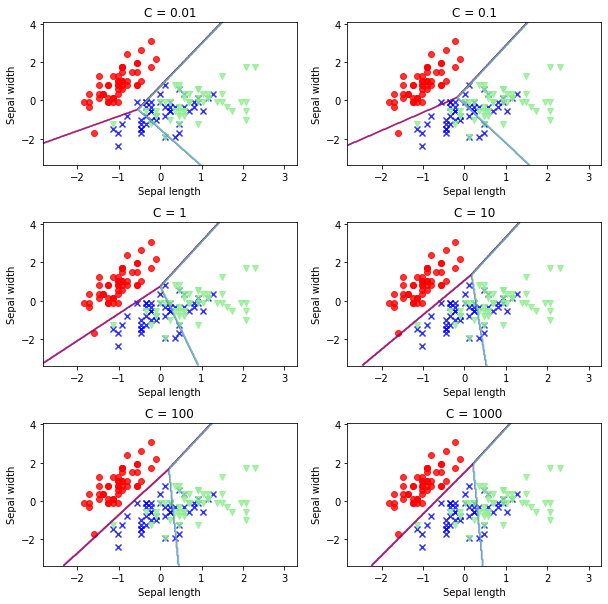

In [35]:
from sklearn.metrics import accuracy_score # 导入准确率指标
C_param_range = [0.01,0.1,1,10,100,1000]
sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
sepal_acc_table['C_parameter'] = C_param_range
plt.figure(figsize=(10, 10))
j = 0
for i in C_param_range:
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(X_train_sepal,y_train_sepal)
    y_pred_sepal = lr.predict(X_test_sepal)
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1    
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_sepal, y = Y_combined_sepal, 
                          classifier = lr, test_idx = range(0,150))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('C = %s'%i)

In [38]:
lr = LogisticRegression(penalty='l2', C=10)
lr.fit(X_train_sepal, y_train_sepal)
score = lr.score(X_test_sepal, y_test_sepal)
print('SK逻辑回归准确率：{:.2f}%'.format(score*100))

SK逻辑回归准确率：80.00%


练习一 泰坦尼克

In [40]:
import numpy as np
import pandas as pd
df_taitan = pd.read_csv('train.csv')
df_taitan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df_taitan.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [50]:
df_taitan['Age'] = df_taitan['Age'].fillna(0)

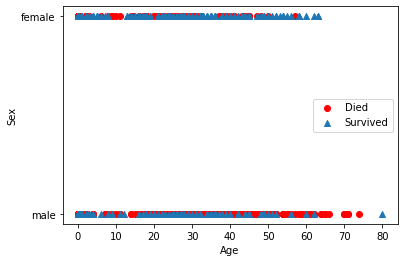

In [51]:
import matplotlib.pyplot as plt
# 以性别+年龄作为输入，查看分类结果散点图
plt.scatter(x=df_taitan.Age[df_taitan.Survived==0],
            y=df_taitan.Sex[df_taitan.Survived==0], c='r')
plt.scatter(x=df_taitan.Age[df_taitan.Survived==1],
            y=df_taitan.Sex[df_taitan.Survived==1], marker='^')
plt.legend(['Died', 'Survived'])
plt.xlabel('Age')
plt.ylabel('Sex')
plt.show()

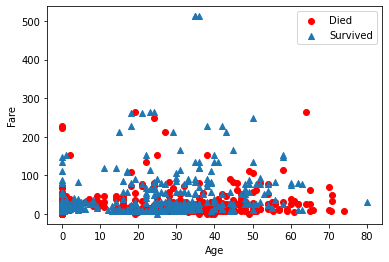

In [52]:
import matplotlib.pyplot as plt
# 以票价+年龄作为输入，查看分类结果散点图
plt.scatter(x=df_taitan.Age[df_taitan.Survived==0],
            y=df_taitan.Fare[df_taitan.Survived==0], c='r')
plt.scatter(x=df_taitan.Age[df_taitan.Survived==1],
            y=df_taitan.Fare[df_taitan.Survived==1], marker='^')
plt.legend(['Died', 'Survived'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [54]:
# 将两个类别型变量转化为哑变量
a = pd.get_dummies(df_taitan['Sex'], prefix='Sex')
b = pd.get_dummies(df_taitan['Embarked'], prefix='Embarked')
# 将哑变量添加进dataframe
frames = [df_taitan, a, b]
df_taitan = pd.concat(frames, axis=1)
df_taitan = df_taitan.drop(columns=['Sex', 'Embarked'])
df_taitan.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [56]:
X = df_taitan.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df_taitan.Survived.values
y = y.reshape(-1, 1)
print('张量X的形状：', X.shape)
print('张量y的形状：', y.shape)

张量X的形状： (891, 10)
张量y的形状： (891, 1)


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('SK泰坦尼克号逻辑回归准确率：{:.2f}%'.format(lr.score(X_test, y_test) * 100))

SK泰坦尼克号逻辑回归准确率：40.42%


In [63]:
# 首先定义一个sigmoid函数，输入Z，返回y'
def sigmoid(z):    
    y_hat = 1/(1+ np.exp(-z))
    return y_hat

In [64]:
# 然后定义损失函数
def cost_function(X,y,w,b):
    y_hat = sigmoid(np.dot(X,w) + b) # Sigmoid逻辑函数 + 线性函数（wX+b）得到y'
#     print (X.shape,w.shape)
    loss = np.abs((y*np.log(y_hat) + (1-y)*np.log(1-y_hat))) # 计算损失
#     cost = np.sum(loss) / X.shape[0]  # 返回整个数据集平均损失  
    cost = np.mean(loss) # 返回整个数据集平均损失
    return cost

In [65]:
def gradient_descent(X,y,w,b,lr,iter) : #定义逻辑回归梯度下降函数
    l_history = np.zeros(iter) # 初始化记录梯度下降过程中误差值(损失)的数组
    w_history = np.zeros((iter,w.shape[0],w.shape[1])) # 初始化权重记录的数组
    b_history = np.zeros(iter) # 初始化记录梯度下降过程中偏置的数组  
    for i in range(iter): #进行机器训练的迭代
        y_hat = sigmoid(np.dot(X,w) + b) #Sigmoid逻辑函数+线性函数(wX+b)得到y'
        loss = (y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
        derivative_w = np.dot(X.T,((y_hat-y)))/X.shape[0]  # 给权重向量求导
        derivative_b = np.sum(y_hat-y)/X.shape[0] # 给偏置求导
        w = w - lr * derivative_w # 更新权重向量，lr即学习速率alpha
        b = b - lr * derivative_b   # 更新偏置，lr即学习速率alpha
        l_history[i] =  cost_function(X,y,w,b) # 梯度下降过程中的损失
        print ("轮次", i+1 , "当前轮训练集损失：",l_history[i])        
        w_history[i] = w # 梯度下降过程中权重的历史 请注意w_history和w的形状
        b_history[i] = b # 梯度下降过程中偏置的历史
    return l_history, w_history, b_history

In [66]:
def predict(X,w,b): # 定义预测函数
    z = np.dot(X,w) + b # 线性函数
    y_hat = sigmoid(z) # 逻辑函数转换
    y_pred = np.zeros((y_hat.shape[0],1)) # 初始化预测结果变量    
    for i in range(y_hat.shape[0]):
        if y_hat[i,0] < 0.5:
            y_pred[i,0] = 0 # 如果预测概率小于0.5，输出分类0
        else:
            y_pred[i,0] = 1 # 如果预测概率大于0.5，输出分类0
    return y_pred # 返回预测分类的结果

In [67]:
def logistic_regression(X,y,w,b,lr,iter): # 定义逻辑回归模型
    l_history,w_history,b_history = gradient_descent(X,y,w,b,lr,iter)#梯度下降
    print("训练最终损失:", l_history[-1]) # 打印最终损失
    y_pred = predict(X,w_history[-1],b_history[-1]) # 进行预测
    traning_acc = 100 - np.mean(np.abs(y_pred - y_train))*100 # 计算准确率
    print("逻辑回归训练准确率: {:.2f}%".format(traning_acc))  # 打印准确率
    return l_history, w_history, b_history # 返回训练历史记录

In [68]:
#初始化参数
dimension = X.shape[1] # 这里的维度 len(X)是矩阵的行的数，维度是列的数目
weight = np.full((dimension,1),0.1) # 权重向量，向量一般是1D，但这里实际上创建了2D张量
bias = 0 # 偏置值
#初始化超参数
alpha = 1 # 学习速率
iterations = 100 # 迭代次数

In [69]:
# 用逻辑回归函数训练机器
loss_history, weight_history, bias_history = logistic_regression(X_train,y_train,
                                                                 weight,bias,                                                                 
                                                                 alpha,iterations)

轮次 1 当前轮训练集损失： 0.553958268310138
轮次 2 当前轮训练集损失： 0.5110485390168203
轮次 3 当前轮训练集损失： 0.4916814894355861
轮次 4 当前轮训练集损失： 0.4808582069807635
轮次 5 当前轮训练集损失： 0.47402823762401575
轮次 6 当前轮训练集损失： 0.4693881144962238
轮次 7 当前轮训练集损失： 0.4660809344061831
轮次 8 当前轮训练集损失： 0.46364296459291116
轮次 9 当前轮训练集损失： 0.46179916083636846
轮次 10 当前轮训练集损失： 0.46037565088902094
轮次 11 当前轮训练集损失： 0.45925742961499544
轮次 12 当前轮训练集损失： 0.4583658254355591
轮次 13 当前轮训练集损失： 0.4576455798780062
轮次 14 当前轮训练集损失： 0.4570570226580799
轮次 15 当前轮训练集损失： 0.45657113481529515
轮次 16 当前轮训练集损失： 0.45616633412101754
轮次 17 当前轮训练集损失： 0.4558263282282342
轮次 18 当前轮训练集损失： 0.45553865023681217
轮次 19 当前轮训练集损失： 0.4552936413034305
轮次 20 当前轮训练集损失： 0.4550837322393587
轮次 21 当前轮训练集损失： 0.45490292869570537
轮次 22 当前轮训练集损失： 0.4547464372041947
轮次 23 当前轮训练集损失： 0.45461039009030274
轮次 24 当前轮训练集损失： 0.45449164071884895
轮次 25 当前轮训练集损失： 0.4543876093942436
轮次 26 当前轮训练集损失： 0.45429616617014934
轮次 27 当前轮训练集损失： 0.4542155408502858
轮次 28 当前轮训练集损失： 0.454144253230598
轮次 29 当前轮训练集损失： 0.4

In [70]:
y_pred = predict(X_test,weight_history[-1],bias_history[-1]) # 预测测试集
testing_acc = 100 - np.mean(np.abs(y_pred - y_test))*100 # 计算准确率
print("逻辑回归测试准确率: {:.2f}%".format(testing_acc))

逻辑回归测试准确率: 78.21%


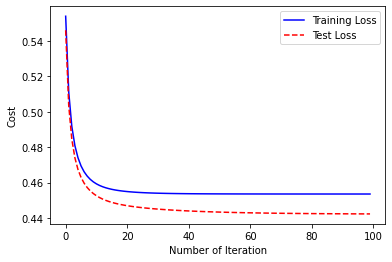

In [71]:
import matplotlib.pyplot as plt # 导入绘图工具
loss_history_test = np.zeros(iterations) # 初始化历史损失
for i in range(iterations): #求训练过程中不同参数带来的测试集损失
    loss_history_test[i] = cost_function(X_test,y_test,weight_history[i],bias_history[i])
index = np.arange(0,iterations,1)
plt.plot(index,loss_history,c='blue',linestyle='solid')
plt.plot(index,loss_history_test,c='red',linestyle='dashed')
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
plt.show() # 同时显示显示训练集和测试集损失曲线

练习二

In [72]:
import numpy as np
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
X_sepal = iris.data[:, [0, 1]]
X_petal = iris.data[:, [2, 3]]
y = iris.target

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(X_petal, y,
                                                                            test_size=0.3, random_state=0)
print('花瓣训练集样本数：', len(X_train_petal))
print('花瓣测试集样本数：', len(X_test_petal))
scaler = StandardScaler()
X_train_petal = scaler.fit_transform(X_train_petal)
X_test_petal = scaler.transform(X_test_petal)

X_combined_petal = np.vstack((X_train_petal, X_test_petal))
Y_combined_petal = np.hstack((y_train_petal, y_test_petal))

花瓣训练集样本数： 105
花瓣测试集样本数： 45


In [74]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C=0.1)
lr.fit(X_train_petal, y_train_petal)
score = lr.score(X_test_petal, y_test_petal)
print('SK逻辑回归准确率：{:.2f}%'.format(score*100))

SK逻辑回归准确率：95.56%


In [75]:
import matplotlib.pyplot as plt # 导入matplotlib
from matplotlib.colors import ListedColormap # 导入Colormap
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):    
    markers = ('o','x','v')
    colors = ('red','blue','lightgreen')
    color_Map = ListedColormap(colors[:len(np.unique(y))])     
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())   
    X_test, Y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl)

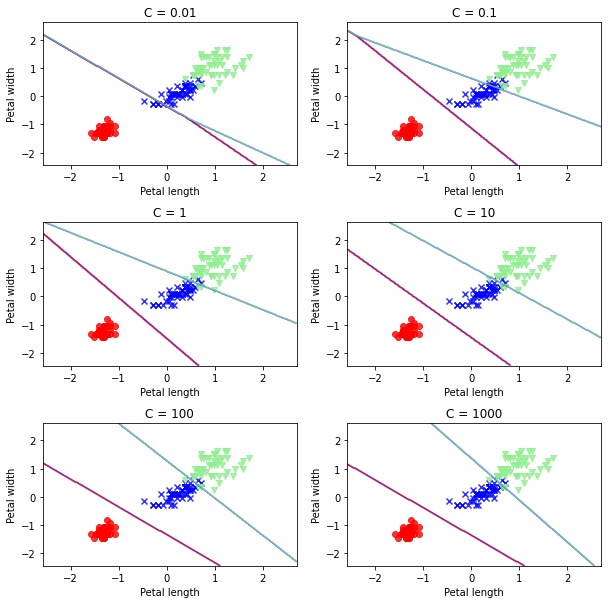

In [76]:
from sklearn.metrics import accuracy_score # 导入准确率指标
C_param_range = [0.01,0.1,1,10,100,1000]
petal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
petal_acc_table['C_parameter'] = C_param_range
plt.figure(figsize=(10, 10))
j = 0
for i in C_param_range:
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(X_train_petal,y_train_petal)
    y_pred_petal = lr.predict(X_test_petal)
    petal_acc_table.iloc[j,1] = accuracy_score(y_test_petal,y_pred_petal)
    j += 1    
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_petal, y = Y_combined_petal, 
                          classifier = lr, test_idx = range(0,150))
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('C = %s'%i)

In [77]:
lr = LogisticRegression(penalty='l2', C=1)
lr.fit(X_train_sepal, y_train_sepal)
score = lr.score(X_test_sepal, y_test_sepal)
print('SK逻辑回归准确率：{:.2f}%'.format(score*100))

SK逻辑回归准确率：82.22%


In [78]:
lr = LogisticRegression(penalty='l2', C=10)
lr.fit(X_train_sepal, y_train_sepal)
score = lr.score(X_test_sepal, y_test_sepal)
print('SK逻辑回归准确率：{:.2f}%'.format(score*100))

SK逻辑回归准确率：80.00%


In [79]:
lr = LogisticRegression(penalty='l2', C=100)
lr.fit(X_train_sepal, y_train_sepal)
score = lr.score(X_test_sepal, y_test_sepal)
print('SK逻辑回归准确率：{:.2f}%'.format(score*100))

SK逻辑回归准确率：80.00%


In [81]:
lr = LogisticRegression(penalty='l2', C=0.1)
lr.fit(X_train_sepal, y_train_sepal)
score = lr.score(X_test_sepal, y_test_sepal)
print('SK逻辑回归准确率：{:.2f}%'.format(score*100))

SK逻辑回归准确率：68.89%


In [83]:
lr = LogisticRegression(penalty='l2', C=1000)
lr.fit(X_train_petal, y_train_petal)
score = lr.score(X_test_petal, y_test_petal)
print('SK逻辑回归准确率：{:.2f}%'.format(score*100))

SK逻辑回归准确率：97.78%


In [84]:
lr = LogisticRegression(penalty='l2', C=10000)
lr.fit(X_train_petal, y_train_petal)
score = lr.score(X_test_petal, y_test_petal)
print('SK逻辑回归准确率：{:.2f}%'.format(score*100))

SK逻辑回归准确率：97.78%
